# **Deep Learning Project: Street View Housing Number Digit Recognition**
--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive # Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
from types import LambdaType
import os  # Interact with the operating system and filesystem
import h5py  # Hierarchical Data Format (HDF5) files
import random  # Random number generator
import numpy as np  # Numerical calculations
import pandas as pd  # For loading data from CSV into DataFrames]
import tensorflow as tf  # TensorFlow main module
import keras # main neural network module
from tensorflow.keras.models import Sequential  # Create sequential layered neural networks
from tensorflow.keras.layers import (
   Conv2D,  # 2D convolutional layers for images
   LeakyReLU,  # Activation function layers
   MaxPooling2D,  # Maximum pooling layers
   Flatten,  # Flatten layers into 1D vectors
   Dense,  # Fully connected layer
   Dropout,  # Delete/ignore certain neurons to avoid overfitting
   BatchNormalization  # Normalize layer inputs for improved performance
)
from tensorflow.keras.optimizers import ( # Optimizers
    Adam,
    Adafactor,
    Lamb
)
from tensorflow.keras.utils import to_categorical  # One-hot encoder for categorical features
from tensorflow.keras.losses import CategoricalCrossentropy  # Loss function
from tensorflow.keras.metrics import Accuracy  # Accuracy metric to evaluate model performance
from sklearn.preprocessing import OneHotEncoder  # One-hot encoder for categorical features
from sklearn.metrics import (
   classification_report,  # Generate a detailed classification report
   confusion_matrix  # Visualize model performance with a confusion matrix
)
import matplotlib.pyplot as plt  # Create charts
import seaborn as sns # Create visualizations

**Let us check the version of tensorflow.**

In [ ]:
print(f"The version of TensorFlow is {tf.__version__}")

The version of TensorFlow is 2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
file = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')
file_size = os.path.getsize('/content/drive/MyDrive/SVHN_single_grey1.h5')
print(f"File size: {file_size} bytes") # Make sure the filesize matches what I have locally
print("Keys in the HDF5 file:", list(file.keys())) # Explore the datasets inside the file
x_train = file.get('X_train')[:]
y_train = file.get('y_train')[:]
x_test = file.get('X_test')[:]
y_test = file.get('y_test')[:]
x_val = file.get('X_val')[:]
y_val = file.get('y_val')[:]

File size: 491644096 bytes
Keys in the HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
# Check the shape of the 6 datasets we loaded from the file to ensure they are complete
print("The X training set has the dimmensions ", x_train.shape)
print("The Y training set has the dimmensions ", y_train.shape)

print("The X testing set has the dimmensions ", x_test.shape)
print("The Y testing set has the dimmensions ", y_test.shape)

print("The X validation set has the dimmensions ", x_val.shape)
print("The Y validation set has the dimmensions ", y_val.shape)

The X training set has the dimmensions  (42000, 32, 32)
The Y training set has the dimmensions  (42000,)
The X testing set has the dimmensions  (18000, 32, 32)
The Y testing set has the dimmensions  (18000,)
The X validation set has the dimmensions  (60000, 32, 32)
The Y validation set has the dimmensions  (60000,)


**:**
- There are 42,000 images in the training set; 18,000 images in the testing set; and 60,000 images in the validation set.
- The images in the training, testing, and validation sets have the same 32x32 dimmensions so our data appears to have been loaded correctly.
- The training, testing, and validation sets have matching numbers of samples so there should be no problem training a model and making preditions.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

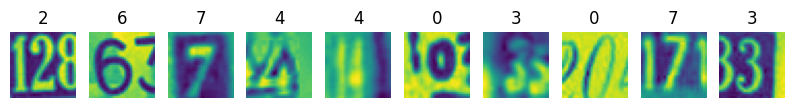

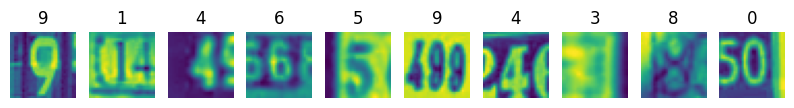

In [ ]:
# Plot the first 10 images and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

# Plot 10 randomly selected images and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    idx = random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[idx])
    plt.title(y_train[idx])
    plt.axis('off')

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape of first image in the training dataset: ", x_train[0].shape)
print("First image pixels:\n", x_train[0])

Shape of first image in the training dataset:  (32, 32)
First image pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalize and flatten the training and validation data set to be able to pass it into the first hidden layer
x_train = x_train.reshape(-1, 1024)/255.0
x_test = x_test.reshape(-1, 1024)/255.0
x_val = x_val.reshape(-1, 1024)/255.0

Print the shapes of Training and Test data

In [ ]:
# Print the new shapes of the train and the test dataset.
print("New shape of training data: ", x_train.shape)
print("New shape of test data: ", x_test.shape)
print("New shape of validation data: ", x_val.shape)

New shape of training data:  (42000, 1024)
New shape of test data:  (18000, 1024)
New shape of validation data:  (60000, 1024)


### **One-hot encode output**

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**:**
- After normalizing and flattening the data, it has a new shape that can be fed to the input layer of a neural network.
- 32^2=1,024 so the dimmensions of the images have been multiplied together to determine the length of a sinlge vector that can hold all of the pixel values.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(20250728) # for the numpy functions
random.seed(20250728) # for random generation of numbers in Python
tf.random.set_seed(20250728) # for TensorFlow functions

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def build_ann_model1():
    model = Sequential() # Create a Sequential network
    model.add(Dense(64, input_shape = (x_train.shape[1], ), activation = 'relu')) # Use the shape of the training data to set the number of input neurons (1024 with this dataset)
    model.add(Dense(32, activation = 'relu')) # Hidden layer
    model.add(Dense(10, activation = 'softmax')) # Output layer
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Build the model and print it's shape
model_ANN1 = build_ann_model1()
print(model_ANN1.summary())

# Store the model's performance history
history_ANN1 = model_ANN1.fit(x_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0986 - loss: 2.3131 - val_accuracy: 0.1011 - val_loss: 2.3016
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1045 - loss: 2.2958 - val_accuracy: 0.1058 - val_loss: 2.2613
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1216 - loss: 2.2503 - val_accuracy: 0.1385 - val_loss: 2.2319
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1372 - loss: 2.2278 - val_accuracy: 0.1408 - val_loss: 2.2216
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1378 - loss: 2.2194 - val_accuracy: 0.1423 - val_loss: 2.2187
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1350 - loss: 2.2149 - val_accuracy: 0.1435 - val_loss: 2.2145
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1356 - loss: 2.2129 - val_accuracy: 0.1417 - val_loss: 2.2174
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1345 - loss: 2.2114 - val_accura

### **Plot the Training and Validation Accuracies and write down your Observations.**

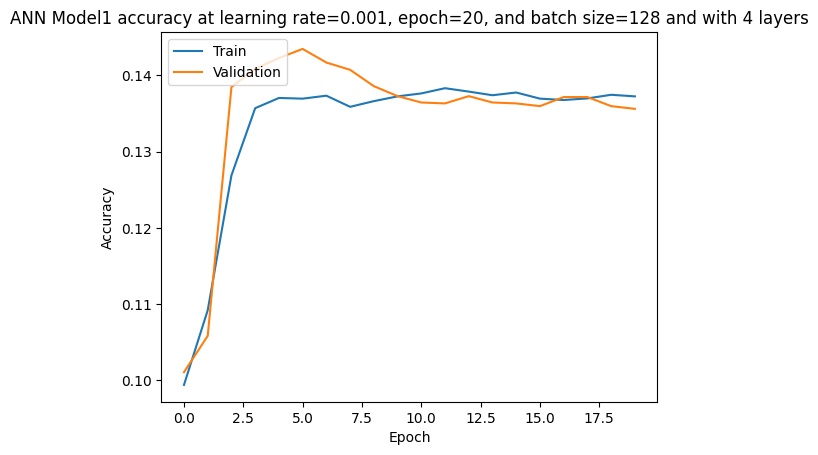

In [ ]:
plt.plot(history_ANN1.history['accuracy'])
plt.plot(history_ANN1.history['val_accuracy'])
plt.title('ANN Model1 accuracy at learning rate=0.001, epoch=20, and batch size=128 and with 4 layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- The model performs very poorly and only better than chance.
- The validation accuracy closely follows the training accuracry suggesting there's not much overfit.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history
tf.keras.backend.clear_session()

np.random.seed(20250728) # for the numpy functions
random.seed(20250728) # for random generation of numbers in Python
tf.random.set_seed(20250728) # for TensorFlow functions

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def build_ann_model2():
    model = Sequential() # Create a Sequential network
    model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],))) # Use the shape of the training data to set the number of input neurons (1024 with this dataset)
    model.add(Dense(128, activation='relu')) # Hidden layer
    model.add(Dropout(0.2)) # Dropout 20% to avoid overfitting
    model.add(Dense(64, activation='relu')) # Hidden layer
    model.add(Dense(64, activation='relu')) # Hidden layer
    model.add(Dense(32, activation='relu')) # Hidden layer
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax')) # Output layer
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
    return model

# Build the model and print it's shape
model_ANN2 = build_ann_model2()
model_ANN2.summary()

# Store the model's performance history
history_ANN2 = model_ANN2.fit(x_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1053 - loss: 2.4058 - val_accuracy: 0.1067 - val_loss: 2.3108
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.1055 - loss: 2.3090 - val_accuracy: 0.1595 - val_loss: 2.2693
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1975 - loss: 2.1158 - val_accuracy: 0.3615 - val_loss: 1.9332
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4489 - loss: 1.6201 - val_accuracy: 0.5500 - val_loss: 1.3974
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5500 - loss: 1.3644 - val_accuracy: 0.6004 - val_loss: 1.2377
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5933 - loss: 1.2338 - val_accuracy: 0.6396 - val_loss: 1.1304
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6280 - loss: 1.1513 - val_accuracy: 0.6530 - val_loss: 1.0825
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6544 - loss: 1.0855 - val_accura

### **Plot the Training and Validation Accuracies and write down your Observations.**

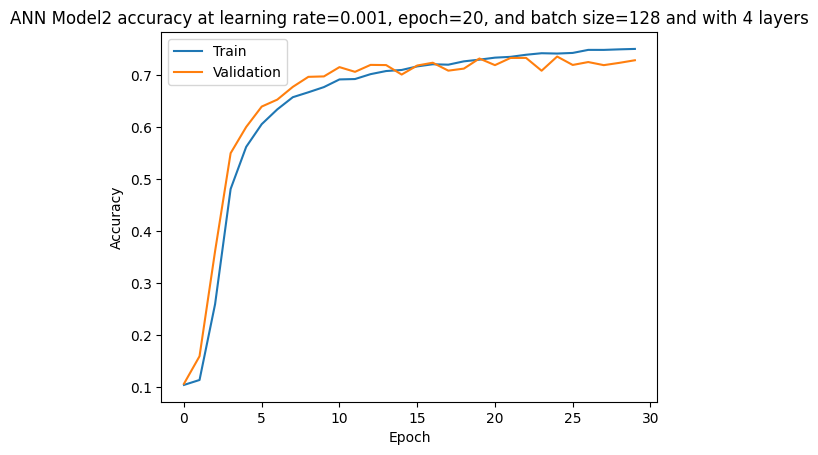

In [ ]:
plt.plot(history_ANN2.history['accuracy'])
plt.plot(history_ANN2.history['val_accuracy'])
plt.title('ANN Model2 accuracy at learning rate=0.001, epoch=20, and batch size=128 and with 4 layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- The validation accuracy is considerably higher in the second model and much better than chance.
- There's no significant decrease in validation accuracy compared to the training accuracy so there does not appear to be meaningful overfit.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Make predictions based on the second model
y_pred_ANN2 = model_ANN2.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert prediction classes to single labels
y_pred_classes_ANN2 = np.argmax(y_pred_ANN2, axis = 1)
# Convert validation classes to single labels
y_true_ANN2 = np.argmax(y_test, axis = 1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1814
           1       0.73      0.78      0.76      1828
           2       0.87      0.70      0.78      1803
           3       0.81      0.56      0.66      1719
           4       0.78      0.82      0.80      1812
           5       0.62      0.72      0.67      1768
           6       0.63      0.81      0.71      1832
           7       0.81      0.77      0.79      1808
           8       0.68      0.67      0.67      1812
           9       0.79      0.65      0.71      1804

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000

[[1464   32    5   20   32   15  120   14   75   37]
 [  86 1430   15   35   81   33   60   36   42   10]
 [  37   51 1267   54   45   60   43  128   65   53]
 [  64  110   44  968   30  271   38   54   99   41]
 [  52   47   13   14 1485   

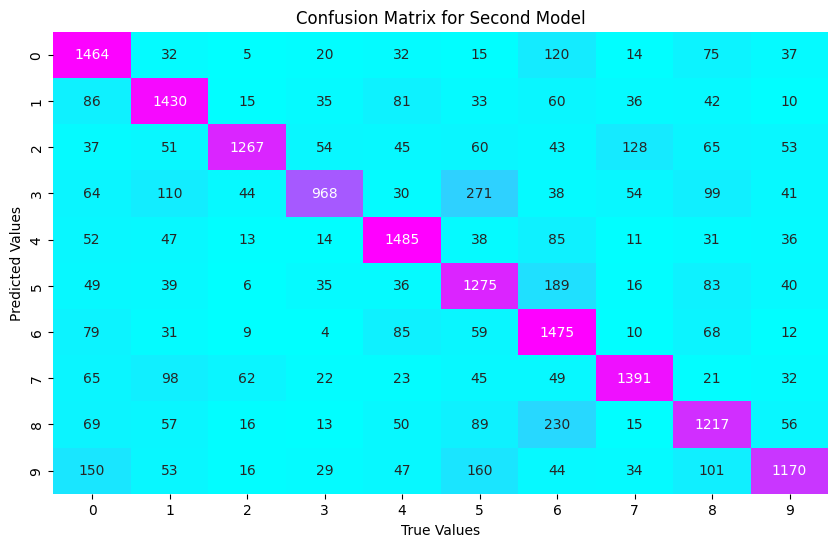

In [ ]:
# Print the classification report and the confusion matrix
print(classification_report(y_true_ANN2, y_pred_classes_ANN2))
print(confusion_matrix(y_true_ANN2, y_pred_classes_ANN2))

# Plot the confusion matrix graphically
plt.figure(figsize = (10, 6))
plt.title("Confusion Matrix for Second Model")
cm = confusion_matrix([int(x) for x in y_true_ANN2], y_pred_classes_ANN2)
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False) # Plot the confusion matrix as heatmap
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

**Final Observations:**

- Overall Accuracy: 73% of the test samples were correctly classified.
- Precision: 74% predicted positives were actually correct.
- Recall: 73% of actual positives were correctly identified.
- F1-score: 73% combined precision and recall metric.

- Numbers 3, 5 and 8 have the lowest F1 scores, suggesting they may be confused with each other.

- The model executes relatively quickly so additional neurons and additional layers could be added to improve performance.

- Data augmentation may improve performance with new image samples or transformations of the existing images.

- The filters available in convolutional networks would likely improve performance.




## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Read in the file for CNN model run, and extract the train and the test datasets
file = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')
file_size = os.path.getsize('/content/drive/MyDrive/SVHN_single_grey1.h5')
print(f"File size: {file_size} bytes") # Make sure the filesize matches what I have locally
print("Keys in the HDF5 file:", list(file.keys())) # Explore the datasets inside the file
x_train_CNN = file.get('X_train')[:]
y_train_CNN = file.get('y_train')[:]
x_test_CNN = file.get('X_test')[:]
y_test_CNN = file.get('y_test')[:]
x_val_CNN = file.get('X_val')[:]
y_val_CNN = file.get('y_val')[:]

File size: 491644096 bytes
Keys in the HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [ ]:
# Check the shape of the 6 datasets we loaded from the file to ensure they are complete
print("The X training set has the dimmensions ", x_train_CNN.shape)
print("The Y training set has the dimmensions ", y_train_CNN.shape)

print("The X testing set has the dimmensions ", x_test_CNN.shape)
print("The Y testing set has the dimmensions ", y_test_CNN.shape)

print("The X validation set has the dimmensions ", x_val_CNN.shape)
print("The Y validation set has the dimmensions ", y_val_CNN.shape)

The X training set has the dimmensions  (42000, 32, 32)
The Y training set has the dimmensions  (42000,)
The X testing set has the dimmensions  (18000, 32, 32)
The Y testing set has the dimmensions  (18000,)
The X validation set has the dimmensions  (60000, 32, 32)
The Y validation set has the dimmensions  (60000,)


**Observation:**
- The datasets have the same shape as before, so we can be confident that we have successfully loaded all samples.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape of first image in the training dataset: ", x_train_CNN[0].shape)
print("First image pixels:\n", x_train_CNN[0])

Shape of first image in the training dataset:  (32, 32)
First image pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the dataset to be able to pass them to the input layer
x_train_CNN = x_train_CNN.reshape(x_train_CNN.shape[0], 32, 32, 1)
x_test_CNN = x_test_CNN.reshape(x_test_CNN.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1
x_train_CNN = x_train_CNN / 255.0
x_test_CNN = x_test_CNN / 255.0
x_val_CNN = x_val_CNN / 255.0

Print New shape of Training and Test

In [ ]:
# Print the new shapes of the train and the test dataset.
print("New shape of training data: ", x_train_CNN.shape)
print("New shape of test data: ", x_test_CNN.shape)
print("New shape of validation data: ", x_val_CNN.shape)

New shape of training data:  (42000, 32, 32, 1)
New shape of test data:  (18000, 32, 32, 1)
New shape of validation data:  (60000, 32, 32)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot-encode the labels
y_train_CNN = to_categorical(y_train_CNN, num_classes=10)
y_test_CNN = to_categorical(y_test_CNN, num_classes=10)

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators
np.random.seed(20250728)
random.seed(20250728)
tf.random.set_seed(20250728)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def build_cnn_model1():
  model = Sequential() # Create a sequential network
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1))) # Input convolutional layer
  model.add(LeakyReLU(0.1)) # Activation
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) # Hidden convolutional layer
  model.add(LeakyReLU(0.1)) # Activation
  model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer
  model.add(Flatten()) # Reshape into 1-D vector
  model.add(Dense(64)) # Fully connected hidden layer
  model.add(LeakyReLU(0.1)) # Activation
  model.add(Dense(10, activation='softmax')) # Output layer
  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

# Call the function cnn_model1 and print the summary
model_CNN1 = build_cnn_model1()
model_CNN1.summary()

# Build and train the model
history_CNN1 = model_CNN1.fit(x_train_CNN, y_train_CNN, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,106 (4.07 MB)

 Trainable params: 1,068,106 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 162s 153ms/step - accuracy: 0.4059 - loss: 1.6432 - val_accuracy: 0.8487 - val_loss: 0.5377
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 204s 154ms/step - accuracy: 0.8547 - loss: 0.5037 - val_accuracy: 0.8669 - val_loss: 0.4680
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.8830 - loss: 0.3956 - val_accuracy: 0.8683 - val_loss: 0.4749
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 202s 142ms/step - accuracy: 0.9063 - loss: 0.3194 - val_accuracy: 0.8767 - val_loss: 0.4632
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 196s 137ms/step - accuracy: 0.9210 - loss: 0.2622 - val_accuracy: 0.8783 - val_loss: 0.4813
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 153s 145ms/step - accuracy: 0.9324 - loss: 0.2160 - val_accuracy: 0.8795 - val_loss: 0.5269
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 144s 137ms/step - accuracy: 0.9421 - loss: 0.1849 - val_accuracy: 0.8742 - val_loss: 0.6000
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 203s 139ms/step - ac

### **Plot the Training and Validation Accuracies and Write your observations.**

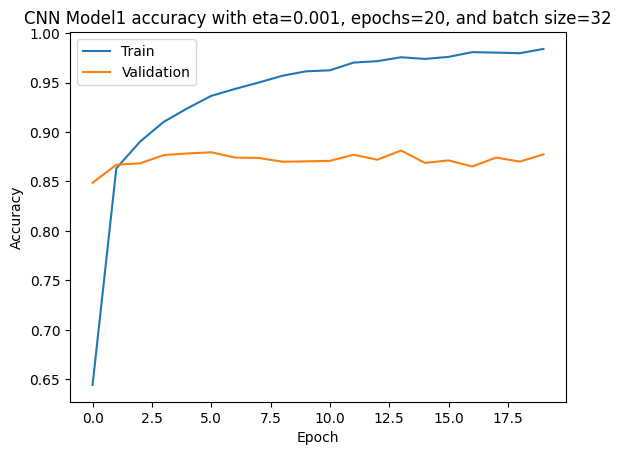

In [ ]:
# Plot the training and validation accuracy scores
plt.plot(history_CNN1.history['accuracy'])
plt.plot(history_CNN1.history['val_accuracy'])
plt.title('CNN Model1 accuracy with eta=0.001, epochs=20, and batch size=32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- This model is a significant improvement over the previous neural networks without convolution.
- There appears to be some overfit in the model since the validation set accuracy lags behind the training set accuracy.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clear the previous model's history
tf.keras.backend.clear_session()

# Fix the seed for random number generators
np.random.seed(20250728)
random.seed(20250728)
tf.random.set_seed(20250728)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def build_cnn_model2():
    model = Sequential() # Create the sequential network
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1))) # Input convolutional layer with 3x3 kernel
    model.add(LeakyReLU(0.1)) # Activation
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) # Hidden convolutional layer
    model.add(LeakyReLU(0.1)) # Activation
    model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) # Hidden convolutional layer
    model.add(LeakyReLU(0.1)) # Activation
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same')) # Hidden convolutional layer
    model.add(LeakyReLU(0.1)) # Activation
    model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer
    model.add(BatchNormalization())
    model.add(Flatten()) # Reshape into 1-D vector
    model.add(Dense(64)) # Fully connected hidden layer
    model.add(LeakyReLU(0.1)) # Activation
    model.add(Dropout(0.5)) # Dropout 50% to avoid overfitting
    model.add(Dense(10, activation='softmax')) # Output layer
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Fit the model and print its summary
model_CNN2 = build_cnn_model2()
model_CNN2.summary()

# Build and train the second CNN model
history_CNN2 = model_CNN2.fit(x_train_CNN, y_train_CNN, validation_split=0.2, batch_size=128, verbose=1, epochs=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,994 (2.46 MB)

 Trainable params: 645,610 (2.46 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 257s 965ms/step - accuracy: 0.4050 - loss: 1.8847 - val_accuracy: 0.5451 - val_loss: 1.5356
Epoch 2/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 240s 910ms/step - accuracy: 0.8157 - loss: 0.6051 - val_accuracy: 0.8505 - val_loss: 0.5235
Epoch 3/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 260s 903ms/step - accuracy: 0.8595 - loss: 0.4742 - val_accuracy: 0.8942 - val_loss: 0.3602
Epoch 4/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 271s 936ms/step - accuracy: 0.8795 - loss: 0.3921 - val_accuracy: 0.8704 - val_loss: 0.4540
Epoch 5/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 245s 929ms/step - accuracy: 0.8962 - loss: 0.3372 - val_accuracy: 0.8810 - val_loss: 0.4300
Epoch 6/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 261s 927ms/step - accuracy: 0.9069 - loss: 0.2937 - val_accuracy: 0.9036 - val_loss: 0.4123
Epoch 7/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 263s 932ms/step - accuracy: 0.9165 - loss: 0.2673 - val_accuracy: 0.9093 - val_loss: 0.3673
Epoch 8/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 243s 926ms/step - accuracy: 0.9282 -

### **Plot the Training and Validation accuracies and write your observations.**

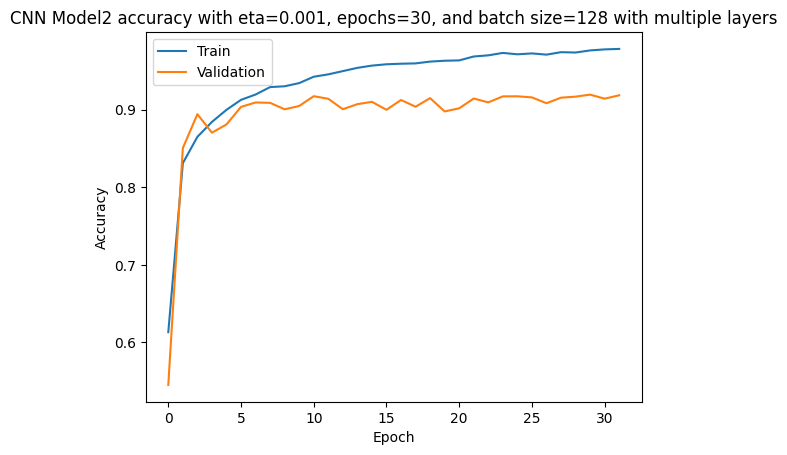

In [ ]:
# Plot the training and Validation accuracy scores
plt.plot(history_CNN2.history['accuracy'])
plt.plot(history_CNN2.history['val_accuracy'])
plt.title('CNN Model2 accuracy with eta=0.001, epochs=30, and batch size=128 with multiple layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
y_pred_CNN2 = model_CNN2.predict(x_test_CNN)

563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert predictions classes to a single label
y_pred_classes_CNN2 = np.argmax(y_pred_CNN2, axis = 1)
# Convert validation observations to a single label
y_true_CNN2 = np.argmax(y_test_CNN, axis = 1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1814
           1       0.89      0.91      0.90      1828
           2       0.93      0.93      0.93      1803
           3       0.88      0.90      0.89      1719
           4       0.95      0.92      0.93      1812
           5       0.94      0.90      0.92      1768
           6       0.88      0.92      0.90      1832
           7       0.94      0.94      0.94      1808
           8       0.90      0.91      0.91      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000

[[1711   20    8    3    3    2   18    7   15   27]
 [  19 1670   13   26   33    7    9   34   14    3]
 [  13   18 1668   16    7    3    8   27   20   23]
 [   2   24   20 1545   11   39   23   16   27   12]
 [  16   44   13   17 1667   

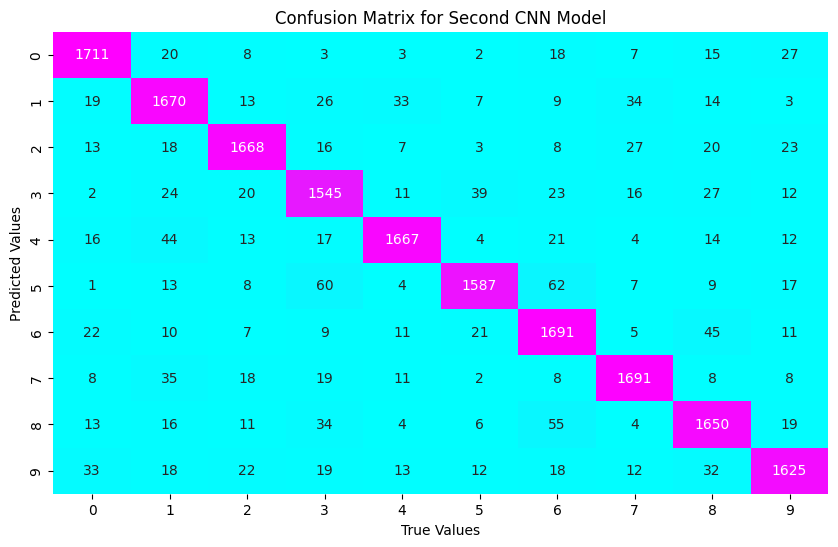

In [ ]:
# Print the classification report and the confusion matrix
print(classification_report(y_true_CNN2, y_pred_classes_CNN2))
print(confusion_matrix(y_true_CNN2, y_pred_classes_CNN2))

# Plot the confusion matrix graphically
plt.figure(figsize = (10, 6))
plt.title("Confusion Matrix for Second CNN Model")
cm = confusion_matrix([int(x) for x in y_true_CNN2], y_pred_classes_CNN2)
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False) # Plot the confusion matrix as heatmap
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

**Final Observations:**
- Overall Accuracy: 92% of the test samples were correctly classified.

- Precision: 92% predicted positives were actually correct.

- Recall: 92% of actual positives were correctly identified.

- F1-score: 92% combined precision and recall metric.

- The benefits of convolutional neural networks for image data are clear compared to the earlier, simpler model.

- Number 3 still has the lowest accuracy, suggesting data augmentation efforts should focus on this category.

- The model executes more slowly compared to the first two simple neural network models.

- Since there is some overfitting in our CNN model and there are many possible combinations of activation functions, learning rates, dropout rates, neurons per layer, and the number of layers it would be good to use the Keras Tuner module to intelligently search for the optimal combination of hyperparameters.

- For future research it would be good to measure the performance of CNNs to predict more than 10 categories.  For example, it would be interesting to see how the same CNN with the same hyperparameters would perform on a Google Street View dataset consisting of the 26 English letters taken from street names as opposed to digits.